# Confidence Intervals for Average Height in the US

## Part A: Confidence Intervals Using the t-Distribution

Based on this data, determine 68%, 95%, and 99% confidence intervals for the average height of people in the US, and describe the meaning of that interval. Use the t distribution in determining your confidence intervals.


## Formula for Confidence Intervals Using the t-Distribution

<div style="color:green">

The confidence interval for the mean is given by:

$
\mu = \bar{x} \pm t * \frac{\sigma}{\sqrt{N}}
$

Where:
- $ \bar{x} $ = sample mean  
- $ \sigma $ = sample standard deviation  
- $ N $ = sample size  
- $ t $ = critical value from the t-distribution with $ n-1 $ degrees of freedom (obtained via the stats.t.ppf function). 

68% confidence means that if we repeated this study 100 times
(meaning we sample 21 people for their height from all the people in the world),
about 68 out of those 100 confidence intervals would contain the true population mean.

However, in any single study, we do not know if our confidence interval is
one of the correct ones (that contains the true mean) or one of the incorrect ones.

</div>

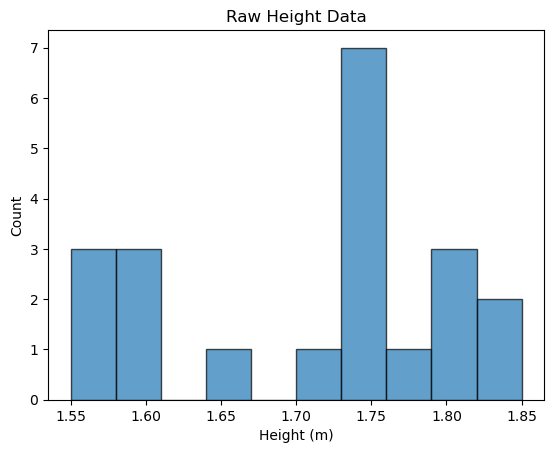

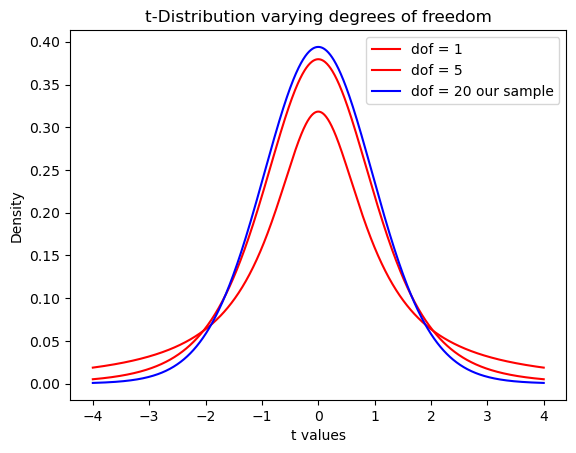

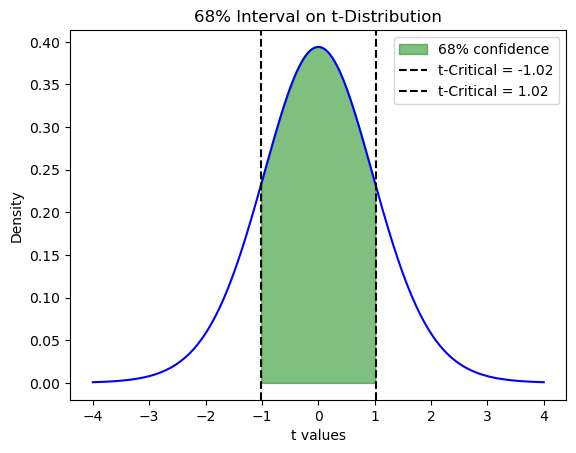

68% Confidence Interval: 1.690 to 1.733
95% Confidence Interval: 1.667 to 1.755
99% Confidence Interval: 1.651 to 1.771


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ============================================================
# Load the Dataset and Extract Heights 
# ============================================================

df_heights = pd.read_csv("heights.csv", header=None)
df_heights.columns = ["height"]  # Rename the column
heights = df_heights["height"].values
plt.hist(heights, edgecolor='black', alpha=0.7)
plt.title("Raw Height Data")
plt.xlabel("Height (m)")
plt.ylabel("Count")
plt.show()

# ============================================================
# Compute Sample Statistics for Confidence Interval 
# ============================================================# 
# Note: ddof = 1 is used because we want to do a bessels correction that subtracts 1 degree
# of freedom when computing a sample standard deviation.
# Sample standard deviation means taht we are taking a sample of peoples heights in a population
# and trying to gauge what this sample tells us about the heights of everyone in the population.
# Note: we cannot  use puplation standard deviation (a statistic commonly used). 

n = len(heights)  # Sample size
mean_height = np.mean(heights) 
std_dev = np.std(heights, ddof=1)  

# ==========================================
# Plot the t-Distribution 
# ==========================================
# t-Distribution is similar in charcterisitcs (but not the same as) the normal distribution.
# The purpose of the t-distribution is to estimate the population mean when the sample size
# is small and/or the population standard deviation is unknown.
# Since we are taking only a subset of height, we not only have a small sample size, 
# but we also do not know the population standard deviation.
# Note: we use n-1 degrees of freedom because we are using sample rather than population stats.
# Note: the t-distribution changes shape based on degrees of freedom of the dataset.

x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.t.pdf(x, df=1), label='dof = 1', color='red')
plt.plot(x, stats.t.pdf(x, df=5), label='dof = 5', color='red')
plt.plot(x, stats.t.pdf(x, df=n-1), label='dof = ' + str(n-1) + ' our sample', color='blue')
plt.title("t-Distribution varying degrees of freedom")
plt.xlabel("t values")
plt.ylabel("Density")
plt.legend()
plt.show()

# ========================================================
# Compute t critical value for 68% confidence interval
# ========================================================
# Note: since the 68% is centered around 0.
# 0.84 is the cutoff point for the upper bound.
# 0.16 is the cutoff point for the lower bound.
# Note: t-Distribution is symmetric around zero and the area under the curve is 1.
# This means we only have to compute one t_crit value and we know the toher.

# Critical values are necessary to calculate because we are not using hte population
# standard deviation. So we need to use the t-distribution paired with the sample std
# to account for the extra uncertainty this introduces.

t_crit = stats.t.ppf(0.84, df=n-1) 
t_neg = -t_crit 

# ========================================================
# Visualize t_crit values on t-distribution
# for our sample
# ========================================================
# When we compute t_crit we are computing the t-value that corresponds to the
# percentile of confidence we want. 

x = np.linspace(-4, 4, 1000) 
y = stats.t.pdf(x, df = n - 1)  # Compute the t-distribution PDF

plt.plot(x, y, color="blue")
plt.fill_between(x, y, where=(x >= t_neg) & (x <= t_crit), color='green', label="68% confidence", alpha=0.5)
plt.title("68% Interval on t-Distribution")
plt.xlabel("t values")
plt.ylabel("Density")
plt.axvline(t_neg, color="black", linestyle="dashed", label=f"t-Critical = {t_neg:.2f}")
plt.axvline(t_crit, color="black", linestyle="dashed", label=f"t-Critical = {t_crit:.2f}")
plt.legend()
plt.show()

# ========================================================
# Confidence Interval Calculation 68%
# ========================================================
# 68% confidence means that if we repeated this study 100 times
# (meaning we sample 21 people for their height from all the people in the world),
# about 68 out of those 100 confidence intervals would contain the true population mean.
#
# However, in any single study, we do not know if our confidence interval is
# one of the correct ones (that contains the true mean) or one of the incorrect ones.

margin_of_error = t_crit * (std_dev / np.sqrt(n))

upper_limit = mean_height + margin_of_error
lower_limit = mean_height - margin_of_error

print(f"68% Confidence Interval: {lower_limit:.3f} to {upper_limit:.3f}")

# ========================================================
# Confidence Interval Calculation 95%
# ========================================================

t_crit = stats.t.ppf(0.975, df=n-1) 
t_neg = -t_crit

margin_of_error = t_crit * (std_dev / np.sqrt(n))

upper_limit = mean_height + margin_of_error
lower_limit = mean_height - margin_of_error

print(f"95% Confidence Interval: {lower_limit:.3f} to {upper_limit:.3f}")

# ========================================================
# Confidence Interval Calculation 99%
# ========================================================

t_crit = stats.t.ppf(0.995, df=n-1) 
t_neg = -t_crit

margin_of_error = t_crit * (std_dev / np.sqrt(n))

upper_limit = mean_height + margin_of_error
lower_limit = mean_height - margin_of_error

print(f"99% Confidence Interval: {lower_limit:.3f} to {upper_limit:.3f}")

## Part B: Confidence Intervals Using Bootstrap Resampling

Determine 68%, 95%, and 99% confidence intervals for the average height of people in the US using bootstrap resampling. Assess how this compares to the intervals you derived in Part A.

<span style="color:green">
The intervals are pretty similar to each other:
  
**t-Distribution:**

- 68% Confidence Interval: 1.690 to 1.733  
- 95% Confidence Interval: 1.667 to 1.755  
- 99% Confidence Interval: 1.651 to 1.771  

**Bootstrap:**

- 68% Confidence Interval: 1.691 to 1.732  
- 95% Confidence Interval: 1.671 to 1.750  
- 99% Confidence Interval: 1.657 to 1.762  

This means that (although it may not look like it) the 21-sample large collection of heights represents data that is normally distributed enough for the theoretical (t-distribution) model-based analysis to agree with the data-driven analysis (bootstrapping). This means that the "normally distributed data" requirement for the t-distribution is met. 

</span>

[1.58   1.8    1.8    1.75   1.6    1.5748 1.85   1.75   1.8    1.57
 1.65   1.74   1.6    1.75   1.55   1.85   1.71   1.75   1.73   1.78
 1.75  ]


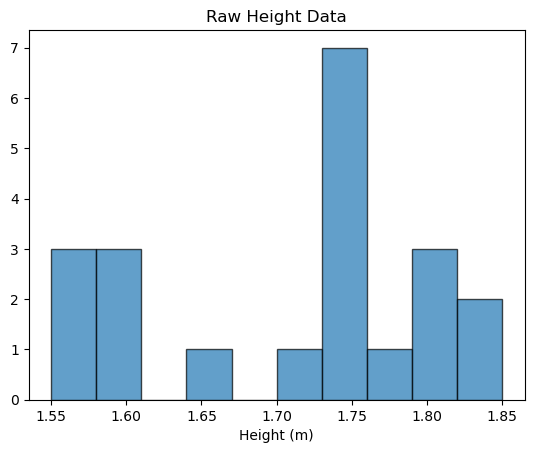

1.55 1.85
1.55 1.85


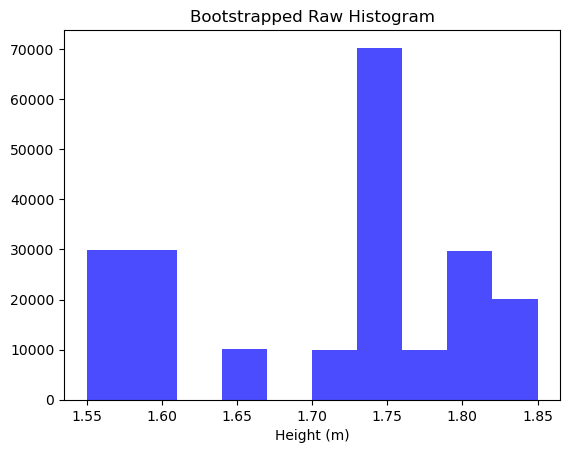

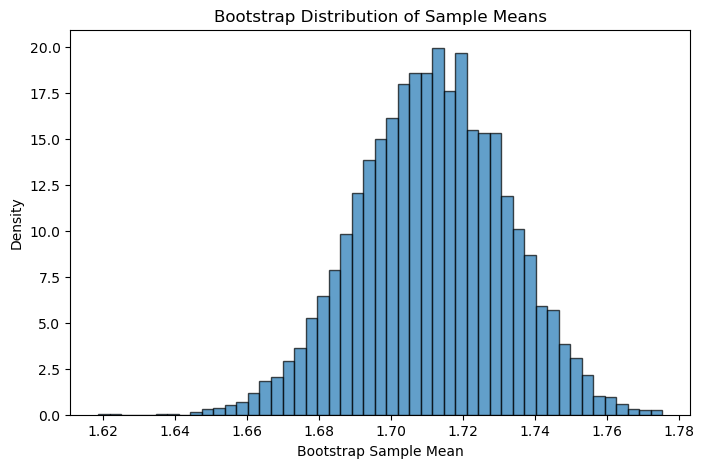

68% confidence interval for Heights from the means of each bootstrap sample: 1.691 to 1.732
95% confidence interval for Heights from the means of each bootstrap sample: 1.670 to 1.750
99% confidence interval for Heights from the means of each bootstrap sample: 1.658 to 1.762


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Load the dataset
df_heights = pd.read_csv("heights.csv", header=None)

# Step 2: Extract Heights
df_heights.columns = ["height"]  # Rename the column
heights = df_heights["height"].values

print(heights)

# ========================================================
# Bootstrapping Step
# Note: histogram is drawn with replacement. At large 
# numbers histograms should look the same
# ========================================================

# Number of bootstrap resamples
n_bootstraps = int(1e4)  # 10,000 bootstrap samples
ndata=len(heights)

hboot=np.random.choice(heights,(n_bootstraps,ndata))

# Plot the raw  data
plt.hist(heights, edgecolor='black', alpha=0.7)
plt.title("Raw Height Data")
plt.xlabel("Height (m)")
plt.show()

# Verify Bootstrapping Worked
print(heights.min(),heights.max())
print(hboot.min(),hboot.max())

# Plot the bootstrapped data
plt.hist(np.ravel(hboot), alpha=0.7, color='blue')
plt.title("Bootstrapped Raw Histogram")
plt.xlabel("Height (m)")
plt.show()

# Compute the mean of each bootstrap sample
bootstrap_means = np.mean(hboot, axis=1)

# Plot histogram of bootstrap sample means
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=np.linspace(bootstrap_means.min(), bootstrap_means.max(), 50), edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Bootstrap Sample Mean")
plt.ylabel("Density")
plt.title("Bootstrap Distribution of Sample Means")
plt.show()

# Compute the 68% confidence interval using percentiles
confidence_interval_68 = np.percentile(bootstrap_means, [16, 84])
print(f"68% confidence interval for Heights from the means of each bootstrap sample: {confidence_interval_68[0]:.3f} to {confidence_interval_68[1]:.3f}")

# Compute the 95% confidence interval using percentiles
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% confidence interval for Heights from the means of each bootstrap sample: {confidence_interval[0]:.3f} to {confidence_interval[1]:.3f}")

# Compute the 99% confidence interval using percentiles
confidence_interval_99 = np.percentile(bootstrap_means, [0.5, 99.5])
print(f"99% confidence interval for Heights from the means of each bootstrap sample: {confidence_interval_99[0]:.3f} to {confidence_interval_99[1]:.3f}")

## Part C: Conclusion

The actual mean height of Americans is 1.7 m. What do you conclude about your results given this information?

<span style="color:green">
1.7 meters falls within all confidence intervals of both the t-distribution as well as the bootstrap method. This means that our sample provided a reasonable estimate of the true mean height of folks in America. The fact that the bootstrap method yielded results is an interesting observation of how both this data-driven analysis method and the method based on the theoretical model (t-distribution) agree.
</span>